Plato workbook

In [53]:
import pandas as pd

from core.core import Core, load_data

In [54]:
core = Core()

Generating Data using core

Note: generated data is saved to generated_data.csv by default




In [55]:
core.generate_data(num_rows=1000, columns=[
    {"name": "age", "data_type": "int", "options": {"min": 18, "max": 75}},
    {"name": "name", "data_type": "name"},
    {"name": "email", "data_type": "email"},
    {"name": "address", "data_type": "address"},
    {"name": "phone", "data_type": "phone"},
    {"name": "company", "data_type": "company"},
    {"name": "text", "data_type": "text", "options": {"max_nb_chars": 200000}},
    {"name": "income", "data_type": "float", "options": {"min": 10000, "max": 250000}},
    {"name": "salary", "data_type": "float", "options": {"min": 10000, "max": 300000}},
    {
        "name": "date_joined",
        "data_type": "date",
        "options": {"min": "2022-01-01", "max": "2022-12-31"}
    },
])

INFO:plato:Generating data...
INFO:plato:Data generated and saved to 'generated_data.csv'.


,age,name,email,address,phone,company,text,income,salary,date_joined
0,40,Dr. Brittney Armstrong,dwayne76@example.com,"131 Christian Rapids\nNorth Jon, LA 27914",949.704.4940x6721,Vaughn-Banks,Deep event bring here action floor structure. ...,59282.692281,186746.642330,2015-02-24
1,72,Anna Figueroa,robertcohen@example.com,"47528 Donald Mission Apt. 590\nNew Julieview, ...",+1-688-870-6566x76173,"Delacruz, Roy and Medina",Painting charge pull week his.\nExplain ok str...,171678.783868,206881.709757,2020-06-02
2,51,Jon Roberts,wardjohn@example.org,"25228 Robert Shoal Apt. 249\nCraigport, FL 04574",7168437489,Hardy PLC,Top he cost talk party religious read. Idea ma...,129427.105378,182457.495124,2012-04-30
3,42,Andrea Jackson,scottheather@example.net,"55421 Matthew Street Apt. 791\nNew Isaacmouth,...",(221)771-4854,Kaiser-Cox,Movement trial hundred audience data. Campaign...,165620.894456,80246.239867,2023-09-25
4,41,James Edwards,brookefleming@example.com,USNV Ross\nFPO AP 93350,218-398-3423x11054,Green-Jones,Other stay property stand what nice about. Whi...,90293.290415,111924.309005,2008-02-09
...,...,...,...,...,...,...,...,...,...,...
995,44,Michael Gibson,andersonjill@example.net,"594 Lambert Islands\nWest Derrickbury, VT 31114",(719)641-8952x780,Moore-Hall,Mouth Congress all sense. Wonder leave around ...,112741.052230,35726.234857,1995-12-19
996,31,Christian Marshall,liuadam@example.net,"11033 Paul Prairie\nSouth Allisonmouth, NE 34144",4279611420,"Stewart, Meyer and Cooley",Between none trade role view.\nAt have lot sty...,21911.741988,293795.773865,1995-03-29
997,44,Jonathan Austin MD,jbowman@example.com,"92015 Conley Route\nShanechester, TX 63991",279.634.9151,Young and Sons,Office unit prevent exist board. Focus their p...,166755.608487,129297.155667,1997-12-06
998,35,Curtis Marshall,williescott@example.net,"3807 Walters Corners\nGarciaville, TX 15627",3626580021,Cortez PLC,Loss service peace north represent out thus.\n...,86345.864044,264178.581949,2020-08-09


Save generated data to SQLite database and query it

In [56]:
core.save_to_sqlite(db_path='data.db', table_name='generated_data')


INFO:plato:Database connection created with data.db
INFO:plato:DataFrame saved to table generated_data
INFO:plato:Data saved to SQLite database 'data.db'.


In [57]:
results = core.query_data(query='SELECT * FROM generated_data WHERE age > 20 LIMIT 200')
print(results)

INFO:plato:Database connection created with data.db
INFO:plato:Query executed: SELECT * FROM generated_data WHERE age > 20 LIMIT 200
INFO:plato:Query executed successfully.
INFO:plato:Database connection closed


[(40, 'Dr. Brittney Armstrong', 'dwayne76@example.com', '131 Christian Rapids\nNorth Jon, LA 27914', '949.704.4940x6721', 'Vaughn-Banks', 'Deep event bring here action floor structure. His better dog anything represent candidate.\nMeeting word artist region research plan dinner drive. Wh ... (201793 characters truncated) ... eresting push oil past religious night today.\nWalk agreement box act factor. Room deal peace rich man. Suddenly commercial to reveal you about size.', 59282.6922811318, 186746.64232992416, '2015-02-24'), (72, 'Anna Figueroa', 'robertcohen@example.com', '47528 Donald Mission Apt. 590\nNew Julieview, PR 08192', '+1-688-870-6566x76173', 'Delacruz, Roy and Medina', 'Painting charge pull week his.\nExplain ok strong option around sort. Southern data reach. Second book strategy commercial note listen cost certain.\ ... (201867 characters truncated) ...  Congress analysis increase. Generation church simple hair church indeed early.\nRate blood though season group. Hard t

Loading data from SQLite database

In [58]:
df = load_data('generated_data.csv')
print(df.info())

INFO:plato:Database connection created with plato.db
INFO:plato:[bold green]INFO:[/bold green] CSV file loaded from generated_data.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1000 non-null   int64  
 1   name         1000 non-null   object 
 2   email        1000 non-null   object 
 3   address      1000 non-null   object 
 4   phone        1000 non-null   object 
 5   company      1000 non-null   object 
 6   text         1000 non-null   object 
 7   income       1000 non-null   float64
 8   salary       1000 non-null   float64
 9   date_joined  1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB
None


In [59]:
from data_transformation.cleaner import DataCleaner

In [60]:
cleaner = DataCleaner(df)


In [61]:
cleaner.remove_duplicates()
cleaner.remove_outliers(['age', 'income'], "IQR", 1.5)
cleaner.convert_data_types(['date_joined'], 'datetime')
cleaner.get_cleaned_data().head()



INFO:data_transformation.cleaner:Duplicates removed
INFO:data_transformation.cleaner:Outliers removed using IQR method
INFO:data_transformation.cleaner:Data types converted for columns: ['date_joined'] to datetime


,age,name,email,address,phone,company,text,income,salary,date_joined
0,40,Dr. Brittney Armstrong,dwayne76@example.com,"131 Christian Rapids\nNorth Jon, LA 27914",949.704.4940x6721,Vaughn-Banks,Deep event bring here action floor structure. ...,59282.692281,186746.642330,2015-02-24
1,72,Anna Figueroa,robertcohen@example.com,"47528 Donald Mission Apt. 590\nNew Julieview, ...",+1-688-870-6566x76173,"Delacruz, Roy and Medina",Painting charge pull week his.\nExplain ok str...,171678.783868,206881.709757,2020-06-02
2,51,Jon Roberts,wardjohn@example.org,"25228 Robert Shoal Apt. 249\nCraigport, FL 04574",7168437489,Hardy PLC,Top he cost talk party religious read. Idea ma...,129427.105378,182457.495124,2012-04-30
3,42,Andrea Jackson,scottheather@example.net,"55421 Matthew Street Apt. 791\nNew Isaacmouth,...",(221)771-4854,Kaiser-Cox,Movement trial hundred audience data. Campaign...,165620.894456,80246.239867,2023-09-25
4,41,James Edwards,brookefleming@example.com,USNV Ross\nFPO AP 93350,218-398-3423x11054,Green-Jones,Other stay property stand what nice about. Whi...,90293.290415,111924.309005,2008-02-09


In [62]:
cleaner.normalize_data(['age', 'income'])
cleaner.get_cleaned_data().head()

INFO:data_transformation.cleaner:Data normalized for columns: ['age', 'income']


,age,name,email,address,phone,company,text,income,salary,date_joined
0,0.385965,Dr. Brittney Armstrong,dwayne76@example.com,"131 Christian Rapids\nNorth Jon, LA 27914",949.704.4940x6721,Vaughn-Banks,Deep event bring here action floor structure. ...,0.205177,186746.642330,2015-02-24
1,0.947368,Anna Figueroa,robertcohen@example.com,"47528 Donald Mission Apt. 590\nNew Julieview, ...",+1-688-870-6566x76173,"Delacruz, Roy and Medina",Painting charge pull week his.\nExplain ok str...,0.673614,206881.709757,2020-06-02
2,0.578947,Jon Roberts,wardjohn@example.org,"25228 Robert Shoal Apt. 249\nCraigport, FL 04574",7168437489,Hardy PLC,Top he cost talk party religious read. Idea ma...,0.497520,182457.495124,2012-04-30
3,0.421053,Andrea Jackson,scottheather@example.net,"55421 Matthew Street Apt. 791\nNew Isaacmouth,...",(221)771-4854,Kaiser-Cox,Movement trial hundred audience data. Campaign...,0.648366,80246.239867,2023-09-25
4,0.403509,James Edwards,brookefleming@example.com,USNV Ross\nFPO AP 93350,218-398-3423x11054,Green-Jones,Other stay property stand what nice about. Whi...,0.334421,111924.309005,2008-02-09


In [63]:
cleaner.standardize_data(['age', 'income'])
cleaner.get_cleaned_data().head()

INFO:data_transformation.cleaner:Data standardized for columns: ['age', 'income']


,age,name,email,address,phone,company,text,income,salary,date_joined
0,-0.424325,Dr. Brittney Armstrong,dwayne76@example.com,"131 Christian Rapids\nNorth Jon, LA 27914",949.704.4940x6721,Vaughn-Banks,Deep event bring here action floor structure. ...,-1.039827,186746.642330,2015-02-24
1,1.490552,Anna Figueroa,robertcohen@example.com,"47528 Donald Mission Apt. 590\nNew Julieview, ...",+1-688-870-6566x76173,"Delacruz, Roy and Medina",Painting charge pull week his.\nExplain ok str...,0.602894,206881.709757,2020-06-02
2,0.233914,Jon Roberts,wardjohn@example.org,"25228 Robert Shoal Apt. 249\nCraigport, FL 04574",7168437489,Hardy PLC,Top he cost talk party religious read. Idea ma...,-0.014634,182457.495124,2012-04-30
3,-0.304645,Andrea Jackson,scottheather@example.net,"55421 Matthew Street Apt. 791\nNew Isaacmouth,...",(221)771-4854,Kaiser-Cox,Movement trial hundred audience data. Campaign...,0.514355,80246.239867,2023-09-25
4,-0.364485,James Edwards,brookefleming@example.com,USNV Ross\nFPO AP 93350,218-398-3423x11054,Green-Jones,Other stay property stand what nice about. Whi...,-0.586593,111924.309005,2008-02-09


In [64]:
df = cleaner.get_cleaned_data()


In [65]:
from data_transformation.transformer import DataTransformer

In [66]:
transformer = DataTransformer(df)

In [67]:
transformer.scale_data(['age', 'income'])


INFO:data_transformation.transformer:Data scaled using minmax method for column: age
INFO:data_transformation.transformer:Data scaled using minmax method for column: income


In [68]:
transformer.get_transformed_data().head()

,age,name,email,address,phone,company,text,income,salary,date_joined
0,0.385965,Dr. Brittney Armstrong,dwayne76@example.com,"131 Christian Rapids\nNorth Jon, LA 27914",949.704.4940x6721,Vaughn-Banks,Deep event bring here action floor structure. ...,0.205177,186746.642330,2015-02-24
1,0.947368,Anna Figueroa,robertcohen@example.com,"47528 Donald Mission Apt. 590\nNew Julieview, ...",+1-688-870-6566x76173,"Delacruz, Roy and Medina",Painting charge pull week his.\nExplain ok str...,0.673614,206881.709757,2020-06-02
2,0.578947,Jon Roberts,wardjohn@example.org,"25228 Robert Shoal Apt. 249\nCraigport, FL 04574",7168437489,Hardy PLC,Top he cost talk party religious read. Idea ma...,0.497520,182457.495124,2012-04-30
3,0.421053,Andrea Jackson,scottheather@example.net,"55421 Matthew Street Apt. 791\nNew Isaacmouth,...",(221)771-4854,Kaiser-Cox,Movement trial hundred audience data. Campaign...,0.648366,80246.239867,2023-09-25
4,0.403509,James Edwards,brookefleming@example.com,USNV Ross\nFPO AP 93350,218-398-3423x11054,Green-Jones,Other stay property stand what nice about. Whi...,0.334421,111924.309005,2008-02-09


In [69]:
transformer.log_transform(['age', 'income'])
transformer.get_transformed_data().head()

INFO:data_transformation.transformer:Log transformation applied to columns: ['age', 'income']


,age,name,email,address,phone,company,text,income,salary,date_joined
0,0.326397,Dr. Brittney Armstrong,dwayne76@example.com,"131 Christian Rapids\nNorth Jon, LA 27914",949.704.4940x6721,Vaughn-Banks,Deep event bring here action floor structure. ...,0.186627,186746.642330,2015-02-24
1,0.666479,Anna Figueroa,robertcohen@example.com,"47528 Donald Mission Apt. 590\nNew Julieview, ...",+1-688-870-6566x76173,"Delacruz, Roy and Medina",Painting charge pull week his.\nExplain ok str...,0.514985,206881.709757,2020-06-02
2,0.456758,Jon Roberts,wardjohn@example.org,"25228 Robert Shoal Apt. 249\nCraigport, FL 04574",7168437489,Hardy PLC,Top he cost talk party religious read. Idea ma...,0.403811,182457.495124,2012-04-30
3,0.351398,Andrea Jackson,scottheather@example.net,"55421 Matthew Street Apt. 791\nNew Isaacmouth,...",(221)771-4854,Kaiser-Cox,Movement trial hundred audience data. Campaign...,0.499784,80246.239867,2023-09-25
4,0.338975,James Edwards,brookefleming@example.com,USNV Ross\nFPO AP 93350,218-398-3423x11054,Green-Jones,Other stay property stand what nice about. Whi...,0.288498,111924.309005,2008-02-09


In [70]:
binned_age = transformer.bin_data('age', 3, ['young', 'middle-aged', 'old'])
binned_age.get_transformed_data().head()

INFO:data_transformation.transformer:Data binned for columns: age


,age,name,email,address,phone,company,text,income,salary,date_joined
0,middle-aged,Dr. Brittney Armstrong,dwayne76@example.com,"131 Christian Rapids\nNorth Jon, LA 27914",949.704.4940x6721,Vaughn-Banks,Deep event bring here action floor structure. ...,0.186627,186746.642330,2015-02-24
1,old,Anna Figueroa,robertcohen@example.com,"47528 Donald Mission Apt. 590\nNew Julieview, ...",+1-688-870-6566x76173,"Delacruz, Roy and Medina",Painting charge pull week his.\nExplain ok str...,0.514985,206881.709757,2020-06-02
2,middle-aged,Jon Roberts,wardjohn@example.org,"25228 Robert Shoal Apt. 249\nCraigport, FL 04574",7168437489,Hardy PLC,Top he cost talk party religious read. Idea ma...,0.403811,182457.495124,2012-04-30
3,middle-aged,Andrea Jackson,scottheather@example.net,"55421 Matthew Street Apt. 791\nNew Isaacmouth,...",(221)771-4854,Kaiser-Cox,Movement trial hundred audience data. Campaign...,0.499784,80246.239867,2023-09-25
4,middle-aged,James Edwards,brookefleming@example.com,USNV Ross\nFPO AP 93350,218-398-3423x11054,Green-Jones,Other stay property stand what nice about. Whi...,0.288498,111924.309005,2008-02-09


In [71]:
# round income using custom function
def round_salary(x):
    return round(x, -3)
transformer.apply_custom_transform('salary', round_salary)
transformer.get_transformed_data().head()


INFO:data_transformation.transformer:Custom transformation applied to columns: salary


,age,name,email,address,phone,company,text,income,salary,date_joined
0,middle-aged,Dr. Brittney Armstrong,dwayne76@example.com,"131 Christian Rapids\nNorth Jon, LA 27914",949.704.4940x6721,Vaughn-Banks,Deep event bring here action floor structure. ...,0.186627,187000.0,2015-02-24
1,old,Anna Figueroa,robertcohen@example.com,"47528 Donald Mission Apt. 590\nNew Julieview, ...",+1-688-870-6566x76173,"Delacruz, Roy and Medina",Painting charge pull week his.\nExplain ok str...,0.514985,207000.0,2020-06-02
2,middle-aged,Jon Roberts,wardjohn@example.org,"25228 Robert Shoal Apt. 249\nCraigport, FL 04574",7168437489,Hardy PLC,Top he cost talk party religious read. Idea ma...,0.403811,182000.0,2012-04-30
3,middle-aged,Andrea Jackson,scottheather@example.net,"55421 Matthew Street Apt. 791\nNew Isaacmouth,...",(221)771-4854,Kaiser-Cox,Movement trial hundred audience data. Campaign...,0.499784,80000.0,2023-09-25
4,middle-aged,James Edwards,brookefleming@example.com,USNV Ross\nFPO AP 93350,218-398-3423x11054,Green-Jones,Other stay property stand what nice about. Whi...,0.288498,112000.0,2008-02-09


In [72]:
from data_analysis.quant import QuantitativeAnalysis

In [73]:
quant = QuantitativeAnalysis(cleaner.get_cleaned_data())

In [74]:
quant.descriptive_statistics()

INFO:data_analysis.quant:Descriptive statistics calculated


,age,income,salary,date_joined
count,1.000000e+03,1.000000e+03,1000.000000,1000
mean,-5.329071e-17,-2.611245e-16,155163.685992,2009-08-09 18:27:21.600000
min,-1.740803e+00,-1.759347e+00,10014.457525,1994-06-18 00:00:00
25%,-9.030442e-01,-8.613575e-01,80557.905153,2002-01-22 06:00:00
50%,5.439448e-02,1.660535e-02,155731.371101,2009-06-13 00:00:00
75%,8.323134e-01,8.419104e-01,229543.127343,2017-03-02 00:00:00
max,1.670072e+00,1.747471e+00,299011.385538,2024-06-01 00:00:00
std,1.000000e+00,1.000000e+00,84619.043299,NaN


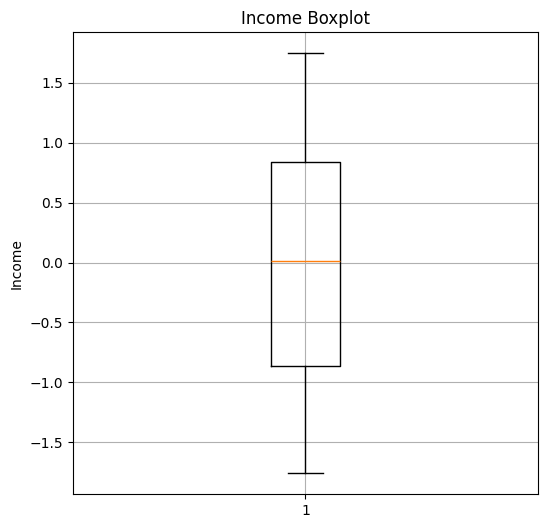

In [75]:
import matplotlib.pyplot as plt

# Visualization 3: Boxplot of 'income'
plt.figure(figsize=(6, 6))
plt.boxplot(df['income'])
plt.title('Income Boxplot')
plt.ylabel('Income')
plt.grid(True)
plt.show()

In [76]:
quant.correlation_matrix()

INFO:data_analysis.quant:Correlation matrix calculated


,age,income,salary
age,1.000000,0.00544,-0.014259
income,0.005440,1.00000,0.001170
salary,-0.014259,0.00117,1.000000


INFO:data_analysis.quant:Correlation matrix calculated


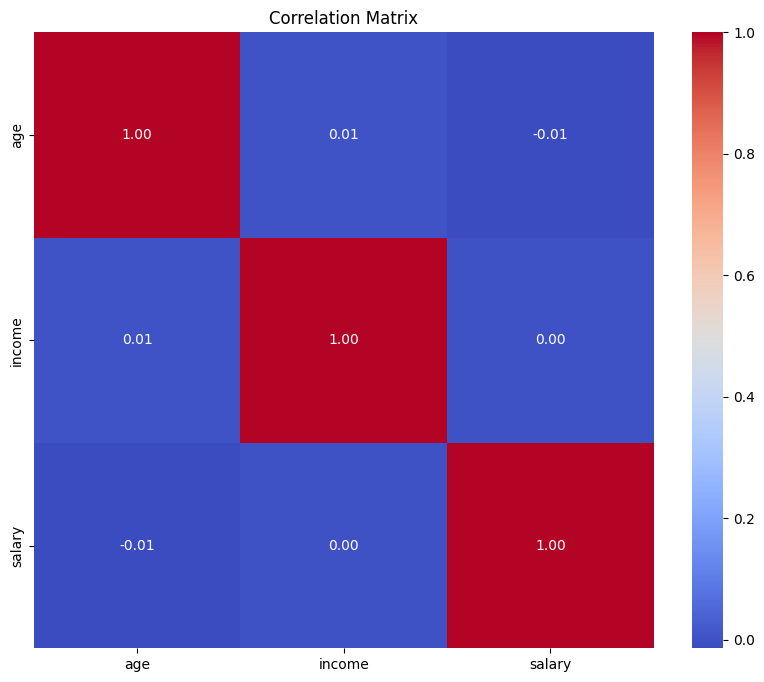

INFO:data_analysis.quant:Correlation matrix plotted


In [77]:
quant.plot_correlation_matrix()

In [78]:
quant.linear_regression('age', ['income', 'salary'])

INFO:data_analysis.quant:Linear regression performed


{'model': LinearRegression(),
 'predictions': array([ 0.00129541,  0.00601591,  0.00080084,  0.01038937,  0.03132081,
        -0.04764301, -0.01539108,  0.01529881, -0.03475673, -0.04246145,
        -0.03289685, -0.02850498,  0.01598454,  0.00716746, -0.04764129,
         0.00956461, -0.01125784, -0.01320808,  0.02290156,  0.02806836,
        -0.03806801,  0.01772648, -0.00785123, -0.02512545, -0.01108014,
         0.00616949,  0.01453477, -0.02474191, -0.00396077, -0.00867032,
         0.02167781, -0.00375915,  0.0162416 , -0.01017679,  0.01457385,
         0.00869588, -0.01671077,  0.01628895,  0.03299568, -0.01430784,
        -0.00346596, -0.03182994, -0.04291539,  0.01741464, -0.01609927,
         0.02664163,  0.02018775, -0.036134  ,  0.00815394, -0.04174582,
         0.01635832,  0.01712766, -0.0193906 ,  0.00419415, -0.00025529,
        -0.02301997, -0.02165313,  0.03703424,  0.03101426, -0.03039645,
         0.03800371, -0.00023913,  0.01428735, -0.01749221,  0.03699727,
      

In [79]:
quant.hypothesis_testing('age', 'income')

INFO:data_analysis.quant:Hypothesis testing performed: t-test between age and income


{'statistic': 4.6473039348788946e-15, 'p_value': 0.9999999999999962}

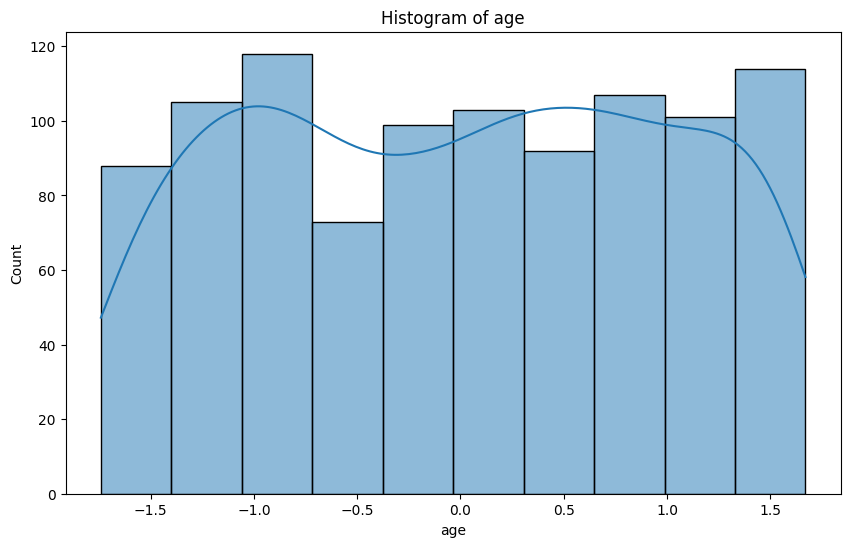

INFO:data_analysis.quant:Histogram plotted for column: age


In [80]:
quant.plot_histogram('age')

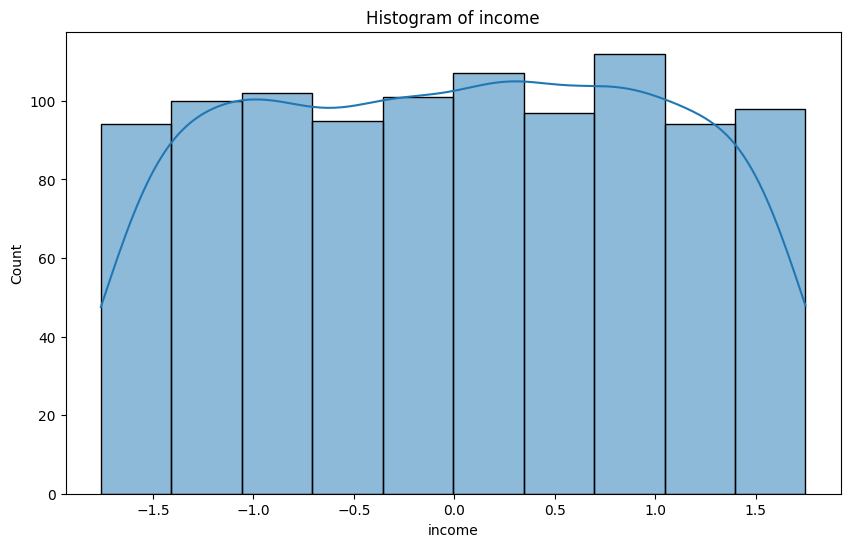

INFO:data_analysis.quant:Histogram plotted for column: income


In [81]:
quant.plot_histogram('income')

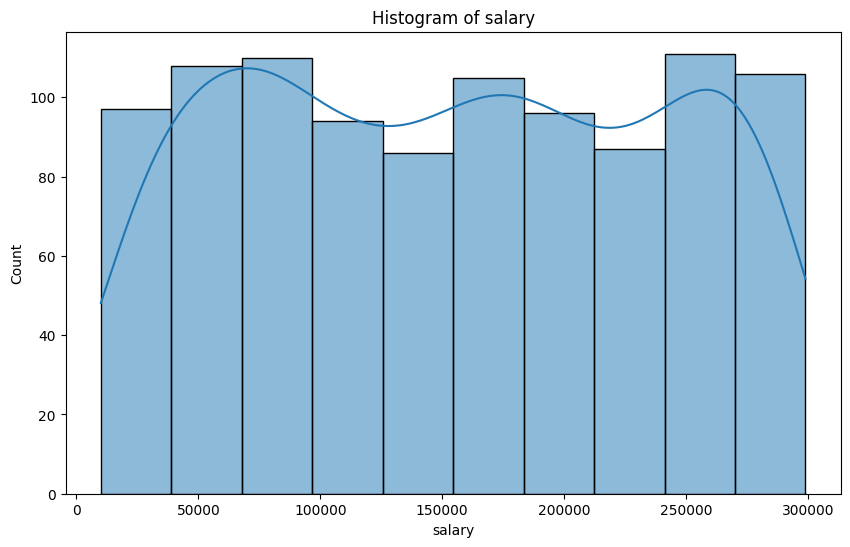

INFO:data_analysis.quant:Histogram plotted for column: salary


In [82]:
quant.plot_histogram('salary')

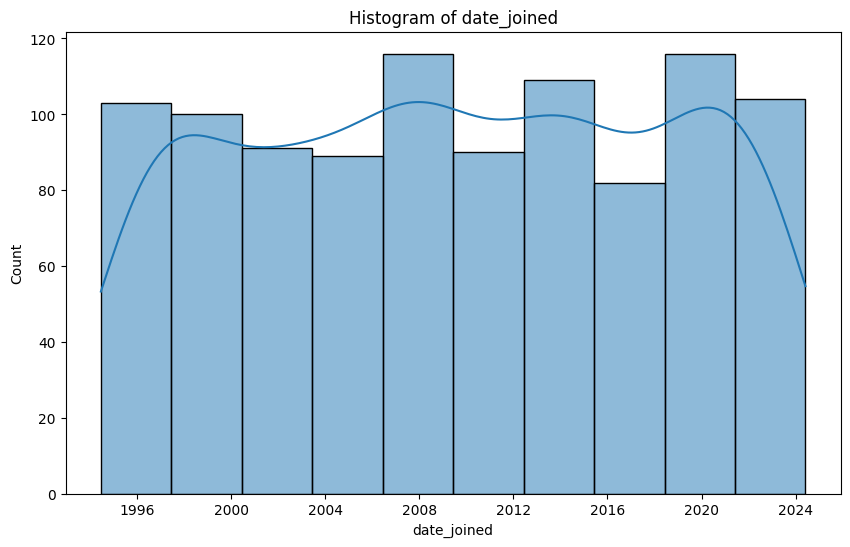

INFO:data_analysis.quant:Histogram plotted for column: date_joined


In [83]:
quant.plot_histogram('date_joined')

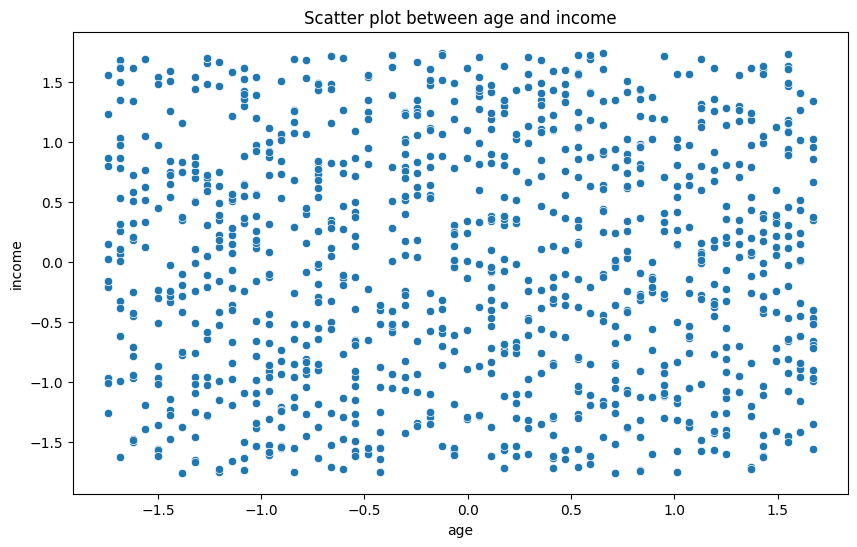

INFO:data_analysis.quant:Scatter plot plotted between age and income


In [84]:
quant.plot_scatter('age', 'income')

In [85]:
from data_analysis.qual import QualitativeAnalysis

In [86]:
qual = QualitativeAnalysis(cleaner.get_cleaned_data())

In [ ]:
qual.sentiment_analysis('text')

In [ ]:
qual.generate_wordcloud('text')

In [ ]:
qual.keyword_extraction('text')

In [ ]:
from data_modeling.modeler import Modeler

In [ ]:
modeler = Modeler(cleaner.get_cleaned_data())

In [ ]:
X_train, X_test, y_train, y_test = modeler.train_test_split('income', ['age', 'salary'])

In [ ]:
lr = modeler.linear_regression(X_train, X_test, y_train, y_test)

In [ ]:
lr_predictions = lr.get('predictions')

In [ ]:
rf = modeler.random_forest_regressor(X_train, X_test, y_train, y_test)

In [ ]:
rf_predictions = rf.get('predictions')

In [ ]:
rf_predictions

In [ ]:
lr_predictions = pd.Series(lr_predictions)
rf_predictions = pd.Series(rf_predictions)
joined_predictions = pd.concat([lr_predictions, rf_predictions], axis=1)

In [ ]:
# add original income values
joined_predictions['income'] = y_test
joined_predictions['age'] = X_test['age']
joined_predictions['salary'] = X_test['salary']

In [ ]:
from data_modeling.visualizer import Visualizer

In [ ]:
visualizer = Visualizer(joined_predictions)

In [ ]:
visualizer.plot_correlation_matrix()


In [ ]:
visualizer.plot_3d_scatter('age', 'salary', 'income', color='income')

In [ ]:
visualizer.plot_distribution(column='income', color='gold', title='Income Distribution by Age')